# Naive Bayes Algorithm and Pima American Natives Dataset

In [22]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

diabetes = pd.read_csv('diabetes.csv')

In [3]:
# Anzeigen der Dimensionen des Datensatzes
diabetes.shape

(768, 9)

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [7]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

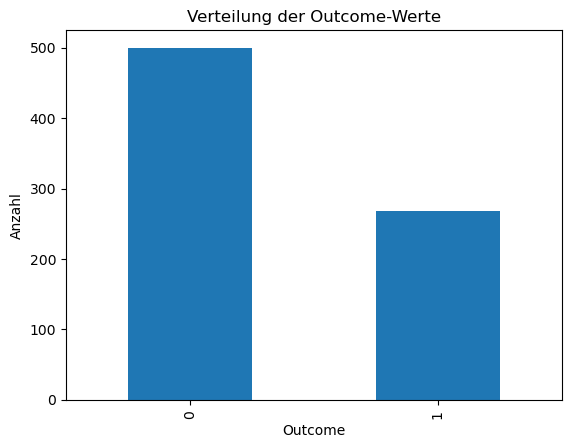

In [8]:
diabetes['Outcome'].value_counts().plot.bar()
plt.title('Verteilung der Outcome-Werte')
plt.xlabel('Outcome')
plt.ylabel('Anzahl')
plt.show()


<Axes: >

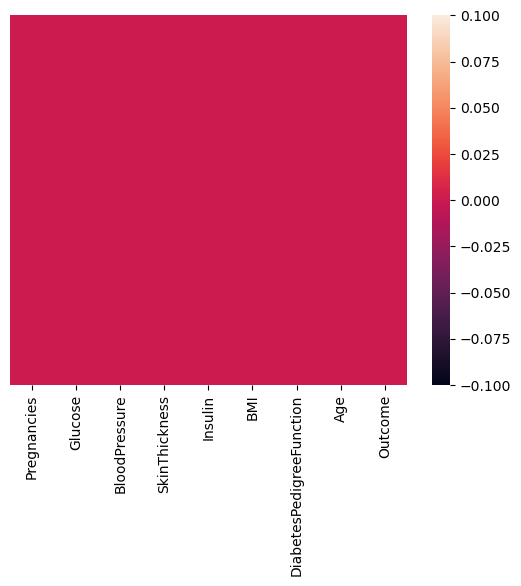

In [9]:
sns.heatmap(diabetes.isnull(), yticklabels=False)

In [10]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>],
       [<Axes: xlabel='Pregnancies', ylabel='BloodPressure'>,
        <Axes: xlabel=

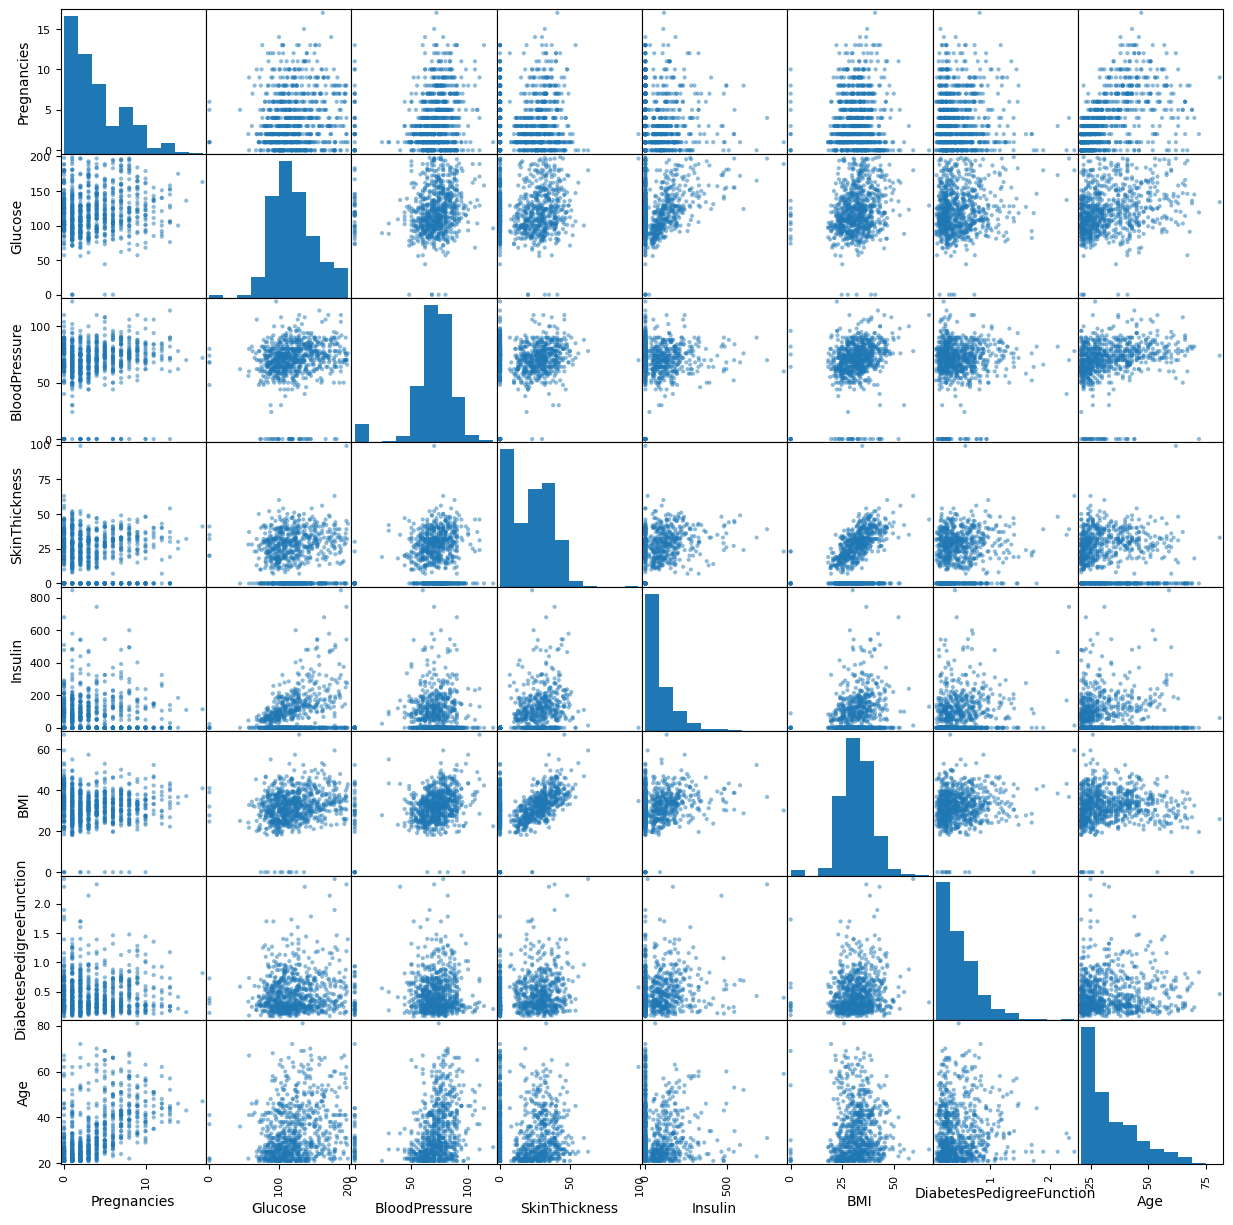

In [11]:
from pandas.plotting import scatter_matrix

# Wähle nur die Spalten für die Scatter-Matrix aus
diabetes_features = diabetes.drop('Outcome', axis=1)

# Erstelle die Scatter-Matrix
scatter_matrix(diabetes_features, figsize=(15,15))

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

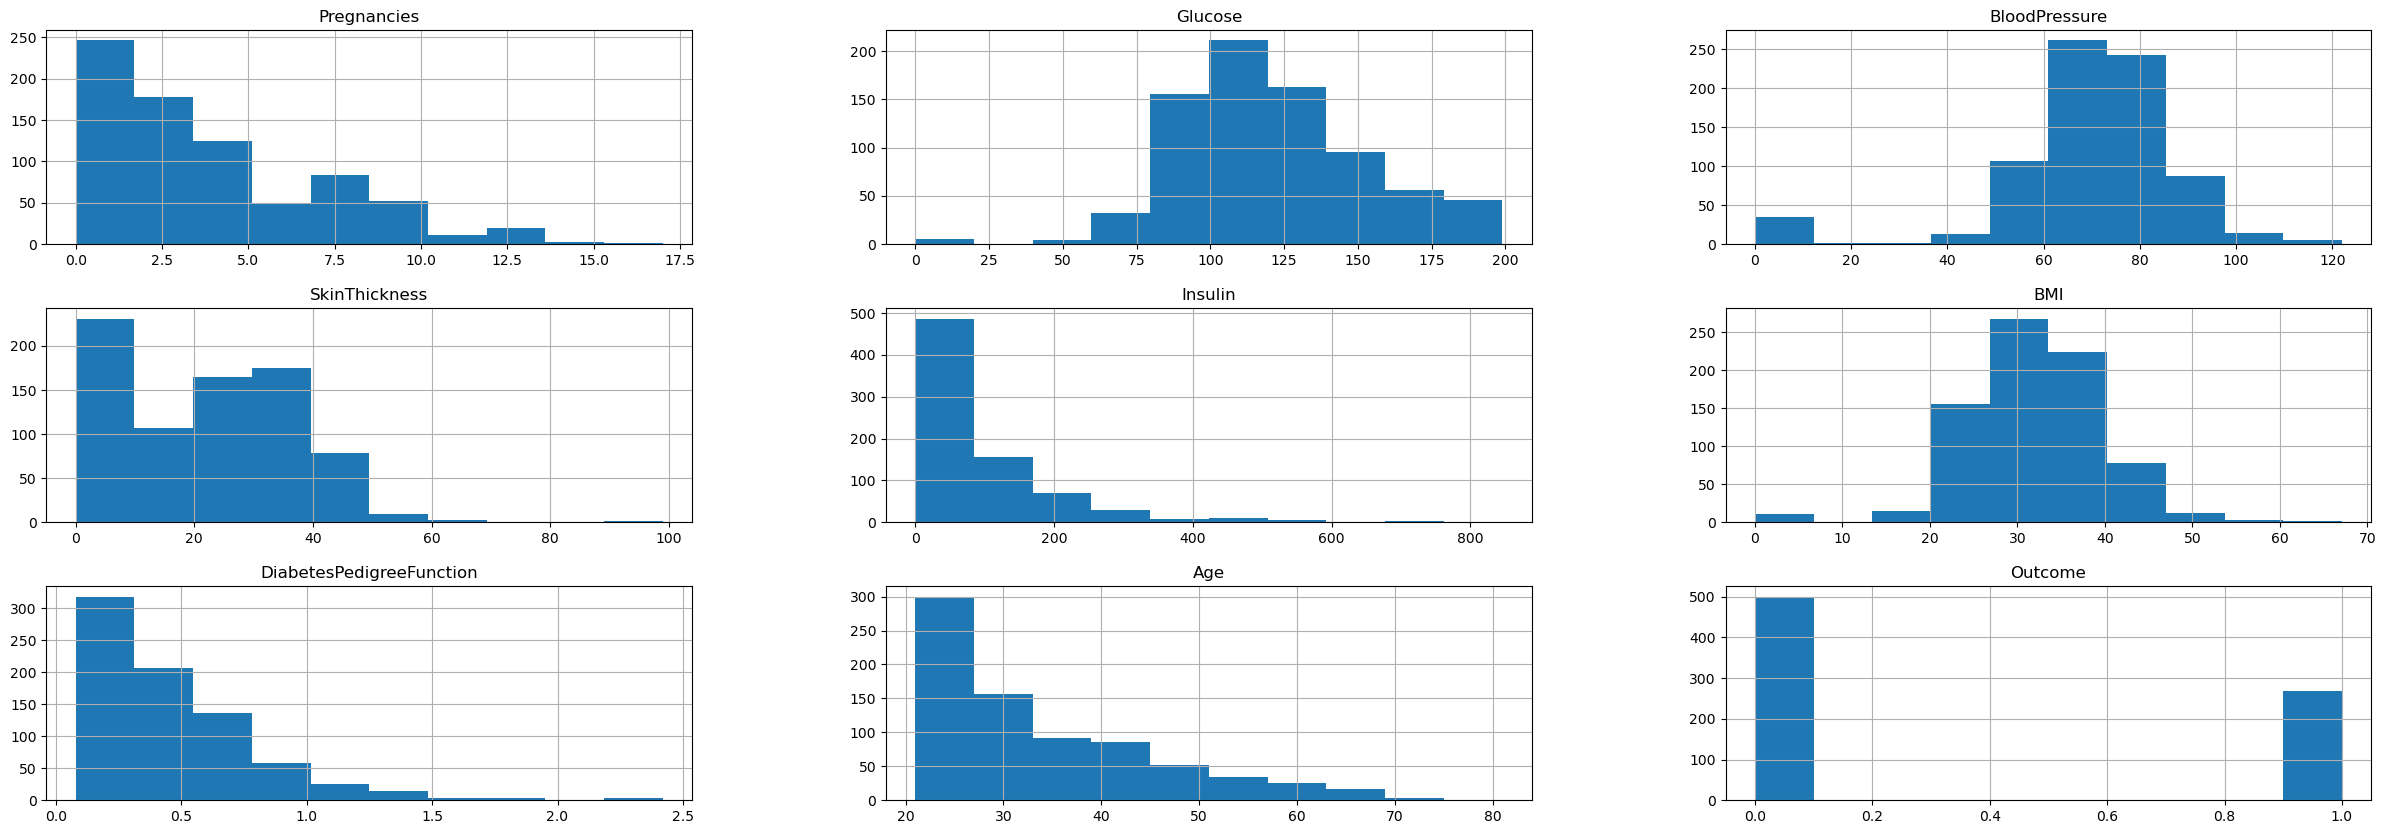

In [12]:
diabetes.hist(figsize=(30,10))

In [13]:
diabetes.corr().abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

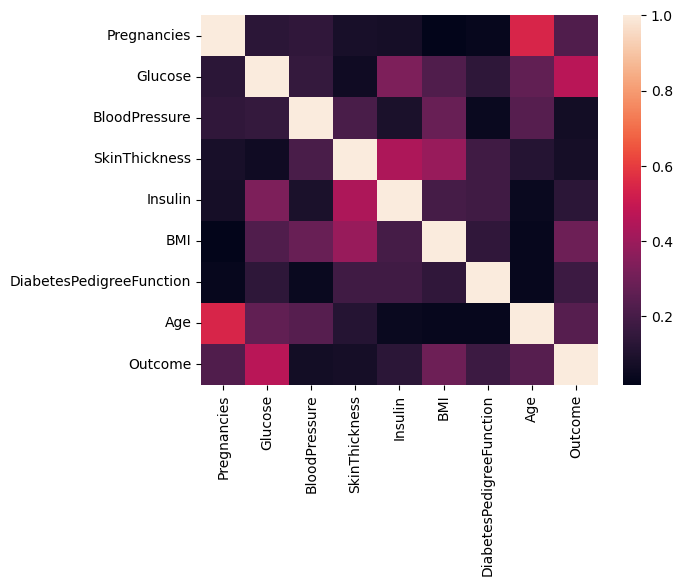

In [14]:
#To check for correlation between different Attributes of the given dataset
corr = diabetes.corr().abs()
sns.heatmap(corr)

"DiabetesPedigreeFunction" ist eine Spalte in dem Diabetes-Datensatz, die den Diabetes-Vererbungsfaktor für jeden Patienten angibt. Der Wert in dieser Spalte gibt an, wie wahrscheinlich es ist, dass ein Patient aufgrund seiner Familiengeschichte an Diabetes erkrankt ist. Die Funktion, die zur Berechnung dieses Werts verwendet wurde, basiert auf einer Studie, die die Vererbung von Diabetes in Familien untersucht hat.

Die DiabetesPedigreeFunction-Spalte ist eine kontinuierliche numerische Variable, d.h. sie enthält dezimale Werte zwischen 0 und 2. Bei höheren Werten wird angenommen, dass das Risiko für Diabetes aufgrund von Vererbung höher ist.


## Ausreißer

In Bezug auf die Anwendung des Naive Bayes-Algorithmus kann das Vorhandensein von Ausreißern je nach Art des Algorithmus und den spezifischen Ausreißern Auswirkungen auf die Ergebnisse der Analyse haben. Es ist jedoch wichtig zu beachten, dass der Naive Bayes-Algorithmus in der Regel robust gegenüber Ausreißern ist, da er darauf abzielt, die Wahrscheinlichkeit der Klassenzuweisung auf der Basis von Wahrscheinlichkeiten der Merkmalsvariablen zu bestimmen

In [15]:
# Anzeigen der Wertebereiche der Merkmalsvariablen
num_cols = diabetes.select_dtypes(include='number').columns
min_max = diabetes[num_cols].agg(['min', 'max'])
min_max

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
min,0,0,0,0,0,0.0,0.078,21,0
max,17,199,122,99,846,67.1,2.420,81,1


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Aufteilung der Features und Labels
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

# Aufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training des Naive Bayes Modells
nb = GaussianNB()
nb.fit(X_train, y_train)

# Vorhersage auf den Testdaten
y_pred = nb.predict(X_test)

# Berechnung der Genauigkeit des Modells
accuracy = accuracy_score(y_test, y_pred)
print(f"Genauigkeit: {accuracy}")

# Erstellung einer Konfusionsmatrix
cm = confusion_matrix(y_test, y_pred)
print(f"Konfusionsmatrix:\n{cm}")


Genauigkeit: 0.7445887445887446
Konfusionsmatrix:
[[119  32]
 [ 27  53]]


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Skaliere alle Spalten außer der Zielvariable 'Outcome'
X_scaled = scaler.fit_transform(diabetes.drop('Outcome', axis=1))

# Erstelle einen neuen DataFrame mit den skalierten Werten
diabetes_scaled = pd.DataFrame(X_scaled, columns=diabetes.columns[:-1])

# Füge die Zielvariable 'Outcome' wieder hinzu
diabetes_scaled['Outcome'] = diabetes['Outcome']


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

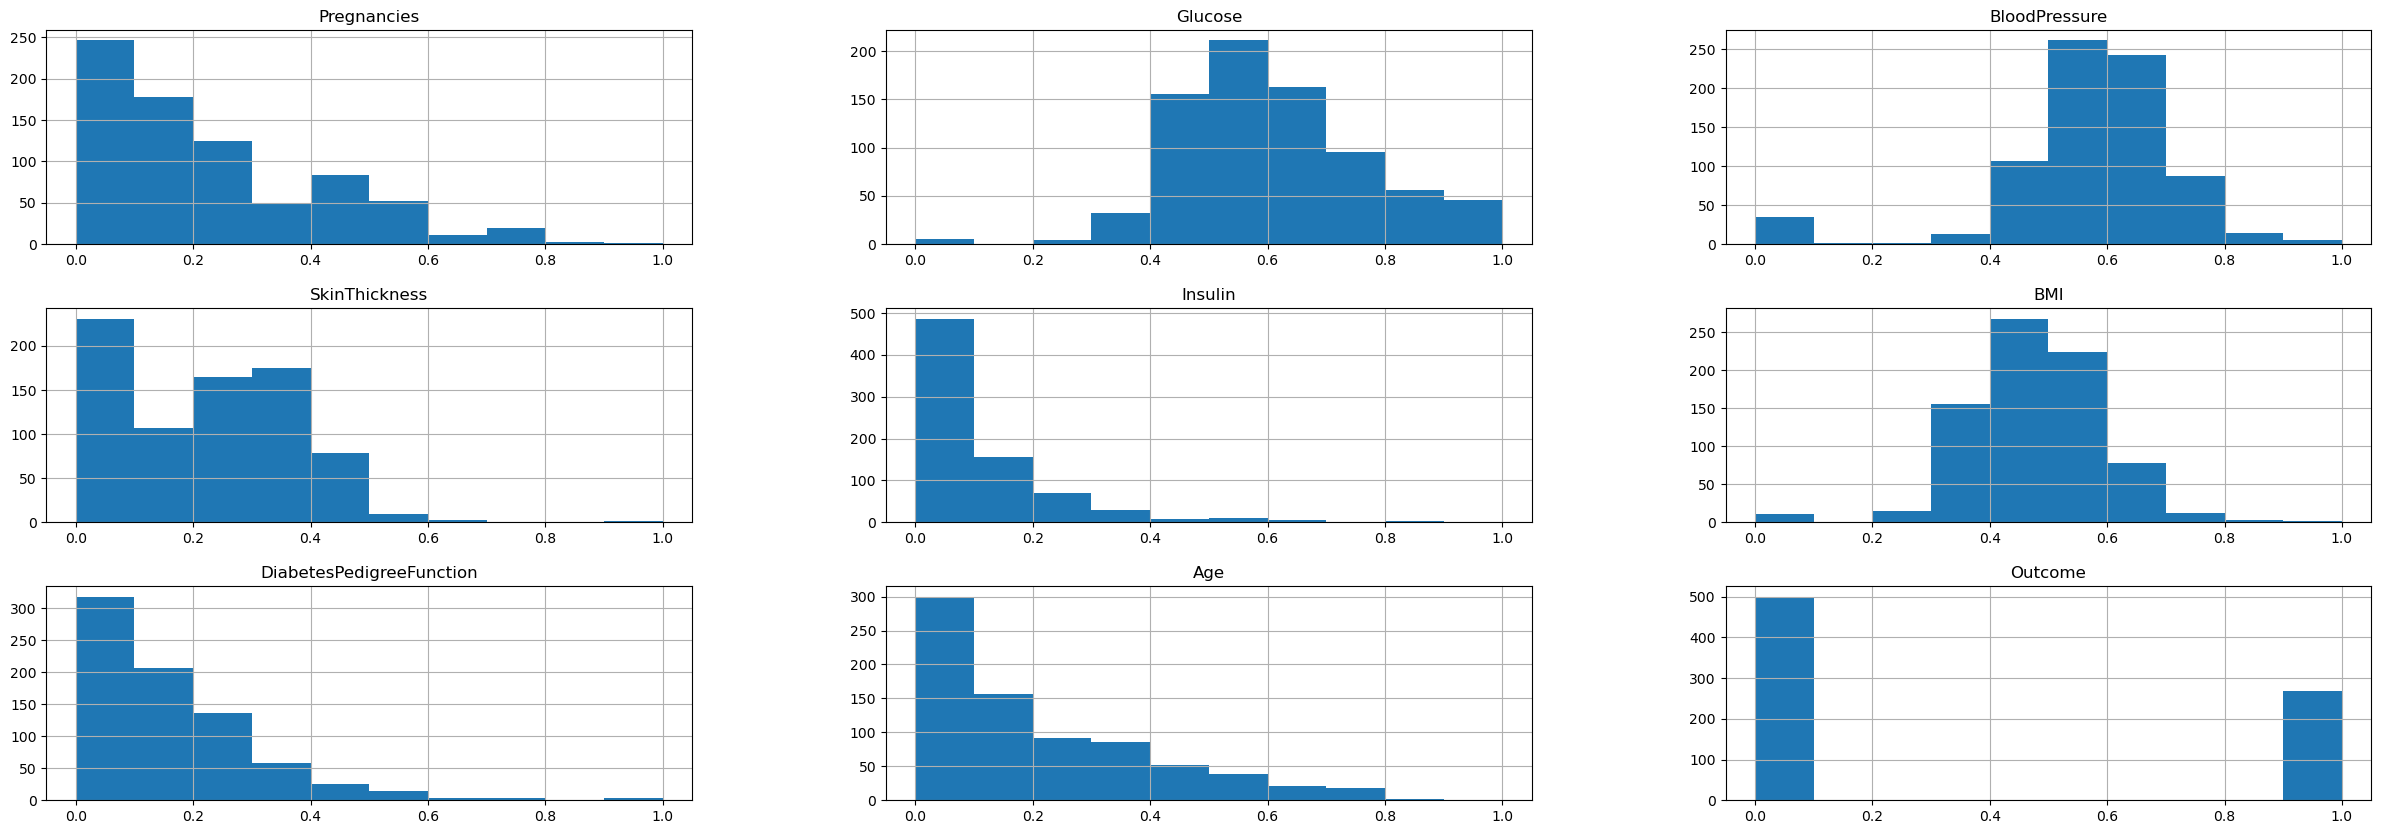

In [18]:
diabetes_scaled.hist(figsize=(30,10))

In [19]:
# Aufteilung der Features und Labels
X = diabetes_scaled.drop('Outcome', axis=1)
y = diabetes_scaled['Outcome']

# Aufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training des Naive Bayes Modells
nb = GaussianNB()
nb.fit(X_train, y_train)

# Vorhersage auf den Testdaten
y_pred = nb.predict(X_test)

# Berechnung der Genauigkeit des Modells
accuracy = accuracy_score(y_test, y_pred)
print(f"Genauigkeit: {accuracy}")

# Erstellung einer Konfusionsmatrix
cm = confusion_matrix(y_test, y_pred)
print(f"Konfusionsmatrix:\n{cm}")

Genauigkeit: 0.7445887445887446
Konfusionsmatrix:
[[119  32]
 [ 27  53]]


In Bezug auf den Naive Bayes Algorithmus ist es möglich, dass das Skalieren der Features in diesem speziellen Fall keinen Einfluss auf die Genauigkeit des Modells hat. Der Naive Bayes Algorithmus basiert auf der Annahme, dass jeder Feature-Wert unabhängig von den anderen ist, und daher kann das Skalieren der Features möglicherweise keinen großen Unterschied machen.